In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Summary metrics

Comment/Uncomment to choose portfolio size and time split:

In [2]:
# stocks_num = '15'
stocks_num = '20'

In [18]:
# time_split = 'Oct'
# time_split = 'Jan'
time_split = 'Apr'
# time_split = 'Jan_6months'

In [19]:
df_diff = pd.read_csv(f'difference/sector_performance_differences_stocks{stocks_num}_{time_split}.csv')

print("Data Overview:")
print(df_diff.head())
print(f"\nThere are {df_diff['sector'].nunique()} sectors in total")

Data Overview:
   sector              portfolio  difference
0  energy  gpt4o_weighted_energy   -0.001319
1  energy     gpt4o_equal_energy    0.003216
2  energy          gpt4o Min Var   -0.012809
3  energy          gpt4o Max Ret   -0.001073
4  energy       gpt4o Max Sharpe   -0.011606

There are 11 sectors in total


In [20]:
df_diff_cleaned = df_diff.copy()

df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
    lambda x: x.split('_weighted')[0] + '_weighted' if 'weighted' in x else x
)

df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
    lambda x: x.split('_equal')[0] + '_equal' if 'equal' in x else x
)

In [21]:
df_diff_cleaned

,sector,portfolio,difference
0,energy,gpt4o_weighted,-0.001319
1,energy,gpt4o_equal,0.003216
2,energy,gpt4o Min Var,-0.012809
3,energy,gpt4o Max Ret,-0.001073
4,energy,gpt4o Max Sharpe,-0.011606
...,...,...,...
655,real_estate,grok3-mini_weighted,0.002374
656,real_estate,grok3-mini_equal,0.011761
657,real_estate,grok3-mini Min Var,-0.003054
658,real_estate,grok3-mini Max Ret,0.008290


In [22]:
pivot_table = df_diff_cleaned.pivot(index='sector', columns='portfolio', values='difference')

In [23]:
sector_order = ['energy', 'materials', 'industrials', 'consumer_discretionary', 'consumer_staples', 'health_care',
                'financials', 'information_technology', 'communication_services', 'utilities', 'real_estate']
pivot_table = pivot_table.reindex(sector_order)

In [24]:
pivot_table

portfolio,dsR1 Max Ret,dsR1 Max Sharpe,dsR1 Min Var,dsR1_equal,dsR1_weighted,dsV3 Max Ret,dsV3 Max Sharpe,dsV3 Min Var,dsV3_equal,dsV3_weighted,...,sonnet-3.7 Max Ret,sonnet-3.7 Max Sharpe,sonnet-3.7 Min Var,sonnet-3.7_equal,sonnet-3.7_weighted,sonnet-4 Max Ret,sonnet-4 Max Sharpe,sonnet-4 Min Var,sonnet-4_equal,sonnet-4_weighted
sector,,,,,,,,,,,,,,,,,,,,,
energy,-0.001073,-0.011606,-0.012809,0.003216,-0.003463,-0.004618,-0.032452,-0.018157,-0.004667,-0.010064,...,-0.003526,-0.031292,-0.017268,-0.002879,-0.001098,-0.001073,-0.011606,-0.012809,0.003216,0.000733
materials,-0.026713,-0.023344,-0.017900,-0.016705,0.000594,-0.017770,-0.015303,0.003765,-0.002020,0.008133,...,-0.039781,-0.020199,-0.016153,-0.013232,-0.011040,-0.025042,-0.003553,0.012586,0.010472,0.008178
industrials,-0.017188,-0.001197,0.017045,0.006545,0.007719,-0.017658,0.002905,0.022282,0.012453,0.012581,...,-0.015855,-0.014912,0.029254,0.009843,0.003292,-0.001652,-0.001652,0.023873,0.017997,0.021677
consumer_discretionary,0.004540,0.011207,0.027607,0.015404,0.010433,0.006221,0.018560,0.030751,0.018044,0.010122,...,-0.005532,0.003440,0.028917,0.007362,0.006548,0.002473,0.012730,0.038780,0.020370,0.015941
consumer_staples,0.005958,0.005958,0.021357,0.032874,0.020955,0.014325,0.017390,0.031019,0.035941,0.028222,...,0.006369,0.006369,0.027727,0.038697,0.016008,0.013585,0.013286,0.027252,0.042178,0.018540
health_care,-0.025246,-0.015482,-0.005204,-0.011974,-0.001212,-0.012872,-0.006878,0.004189,0.005087,0.013101,...,-0.020678,-0.025079,-0.016746,-0.037212,-0.016576,-0.027510,-0.010330,-0.012028,-0.018775,0.002879
financials,-0.029610,-0.007260,-0.009040,-0.019880,-0.024674,-0.020566,-0.002787,-0.000701,-0.012988,-0.024446,...,-0.014094,0.010713,-0.001041,-0.009559,-0.008800,-0.028547,-0.005467,-0.016635,-0.019951,-0.021100
information_technology,-0.058820,-0.040928,0.009779,-0.020985,-0.037509,-0.044130,-0.028033,0.021776,-0.001183,-0.006886,...,-0.038395,-0.030602,0.025292,-0.005723,-0.022792,-0.039335,-0.023437,0.023640,0.006593,-0.015430
communication_services,0.006235,0.041532,0.050193,0.039099,0.011031,0.012311,0.044975,0.052723,0.044329,0.011975,...,0.025871,0.047070,0.053388,0.044328,0.011809,0.012311,0.044975,0.052723,0.044329,0.004810


In [25]:
with pd.option_context('display.max_columns', None):
    display(pivot_table)

portfolio,dsR1 Max Ret,dsR1 Max Sharpe,dsR1 Min Var,dsR1_equal,dsR1_weighted,dsV3 Max Ret,dsV3 Max Sharpe,dsV3 Min Var,dsV3_equal,dsV3_weighted,gemini Max Ret,gemini Max Sharpe,gemini Min Var,gemini_equal,gemini_weighted,gpt4.1 Max Ret,gpt4.1 Max Sharpe,gpt4.1 Min Var,gpt4.1_equal,gpt4.1_weighted,gpt4o Max Ret,gpt4o Max Sharpe,gpt4o Min Var,gpt4o_equal,gpt4o_weighted,gpt5 Max Ret,gpt5 Max Sharpe,gpt5 Min Var,gpt5_equal,gpt5_weighted,grok3 Max Ret,grok3 Max Sharpe,grok3 Min Var,grok3-mini Max Ret,grok3-mini Max Sharpe,grok3-mini Min Var,grok3-mini_equal,grok3-mini_weighted,grok3_equal,grok3_weighted,o4-mini Max Ret,o4-mini Max Sharpe,o4-mini Min Var,o4-mini_equal,o4-mini_weighted,opus-4 Max Ret,opus-4 Max Sharpe,opus-4 Min Var,opus-4_equal,opus-4_weighted,sonnet-3.7 Max Ret,sonnet-3.7 Max Sharpe,sonnet-3.7 Min Var,sonnet-3.7_equal,sonnet-3.7_weighted,sonnet-4 Max Ret,sonnet-4 Max Sharpe,sonnet-4 Min Var,sonnet-4_equal,sonnet-4_weighted
sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
energy,-0.001073,-0.011606,-0.012809,0.003216,-0.003463,-0.004618,-0.032452,-0.018157,-0.004667,-0.010064,-0.001073,-0.011606,-0.012809,0.003216,0.000478,-0.023830,-0.034301,-0.018658,-0.005349,-0.001196,-0.001073,-0.011606,-0.012809,0.003216,-0.001319,-0.001073,-0.011606,-0.012809,0.003216,0.004195,-0.001073,-0.011606,-0.012809,-0.023830,-0.034301,-0.018658,-0.005349,-0.008395,0.003216,-0.000125,-0.023830,-0.034301,-0.018658,-0.005349,-0.004240,-0.001073,-0.011606,-0.012809,0.003216,-0.004690,-0.003526,-0.031292,-0.017268,-0.002879,-0.001098,-0.001073,-0.011606,-0.012809,0.003216,0.000733
materials,-0.026713,-0.023344,-0.017900,-0.016705,0.000594,-0.017770,-0.015303,0.003765,-0.002020,0.008133,-0.029363,0.000089,-0.003939,0.005858,0.003574,-0.041682,-0.019970,-0.018476,-0.016251,-0.011010,-0.022786,-0.020363,-0.014353,-0.010250,-0.004025,-0.022085,-0.018321,-0.013845,-0.009183,-0.008589,-0.016856,-0.013705,-0.006201,-0.021156,-0.001155,-0.002742,0.009270,0.018672,-0.000623,0.001341,-0.033756,-0.011744,-0.010392,-0.003611,0.008516,-0.033791,-0.014411,-0.012358,-0.003650,-0.002368,-0.039781,-0.020199,-0.016153,-0.013232,-0.011040,-0.025042,-0.003553,0.012586,0.010472,0.008178
industrials,-0.017188,-0.001197,0.017045,0.006545,0.007719,-0.017658,0.002905,0.022282,0.012453,0.012581,-0.003850,0.008313,0.019971,0.013723,0.013091,-0.005797,-0.000129,0.011090,0.006675,0.007243,0.001825,0.002821,0.032522,0.023666,0.022722,-0.049793,-0.040078,0.010005,-0.013252,-0.025744,-0.001652,-0.001652,0.023873,-0.003794,-0.004951,0.016256,0.014489,0.014817,0.017997,0.016928,0.010595,0.012866,0.036173,0.027359,0.028941,-0.023186,-0.019875,0.015533,0.003976,0.009166,-0.015855,-0.014912,0.029254,0.009843,0.003292,-0.001652,-0.001652,0.023873,0.017997,0.021677
consumer_discretionary,0.004540,0.011207,0.027607,0.015404,0.010433,0.006221,0.018560,0.030751,0.018044,0.010122,0.010180,0.017224,0.037200,0.024840,0.015810,0.000210,0.008254,0.035575,0.016633,0.014700,-0.014827,0.005028,0.025218,0.005187,0.007685,0.006600,0.018946,0.030009,0.018728,0.016206,0.017998,0.022383,0.038264,0.014045,0.026157,0.043465,0.031073,0.019775,0.021923,0.012107,0.010538,0.020955,0.040829,0.025102,0.009872,0.007062,0.016805,0.037562,0.019338,0.010867,-0.005532,0.003440,0.028917,0.007362,0.006548,0.002473,0.012730,0.038780,0.020370,0.015941
consumer_staples,0.005958,0.005958,0.021357,0.032874,0.020955,0.014325,0.017390,0.031019,0.035941,0.028222,-0.009417,-0.006715,0.017886,0.021230,0.012951,0.011141,0.010094,0.027843,0.035886,0.023560,-0.002233,-0.002233,0.019155,0.030168,0.019790,-0.011743,-0.011743,0.016905,0.017482,0.014466,0.024049,0.017368,0.024776,-0.007337,-0.007337,0.012854,0.021995,0.016401,0.037546,0.028915,-0.003733,-0.001342,0.021022,0.030353,0.029778,0.000740,0.000834,0.023693,0.029667,0.015834,0.006369,0.006369,0.027727,0.038697,0.016008,0.013585,0.013286,0.027252,0.042178,0.018540
health_care,-0.025246,-0.015482,-0.005204,-0.011974,-0.001212,-0.012872,-0.006878,0.00

In [26]:
models = ["gpt4o", "gpt4.1", "o4-mini", "gpt5", "sonnet-3.7", "sonnet-4", "opus-4", "dsV3", "dsR1", "gemini", "grok3", "grok3-mini"]

In [27]:
def get_sector_model_color(sector_data, model):
    """
    Green: LLM weighted outperforms index (< 0)
    Yellow: LLM weighted fails but other strategies outperform 
    Red: All strategies underperform index
    """
    model_metrics = [col for col in sector_data.index if col.startswith(model)]
    
    weighted_metrics = [col for col in model_metrics if 'weighted' in col]
    other_metrics = [col for col in model_metrics if 'weighted' not in col]
    
    weighted_value = sector_data[weighted_metrics[0]]
    
    other_values = [sector_data[col] for col in other_metrics]
    
    if weighted_value is not None and weighted_value < 0:
        return '#90EE90'  # Green
    elif weighted_value is not None and any(v < 0 for v in other_values):
        return '#FFD700'  # Yellow
    else:
        return '#FFB6C1'  # Red

In [28]:
color_matrix = pd.DataFrame(index=pivot_table.index, columns=models)

In [29]:
color_matrix

,gpt4o,gpt4.1,o4-mini,gpt5,sonnet-3.7,sonnet-4,opus-4,dsV3,dsR1,gemini,grok3,grok3-mini
sector,,,,,,,,,,,,
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
materials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industrials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumer_discretionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumer_staples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
information_technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communication_services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
for sector in pivot_table.index:
    sector_data = pivot_table.loc[sector]
    for model in models:
        color_matrix.loc[sector, model] = get_sector_model_color(sector_data, model)

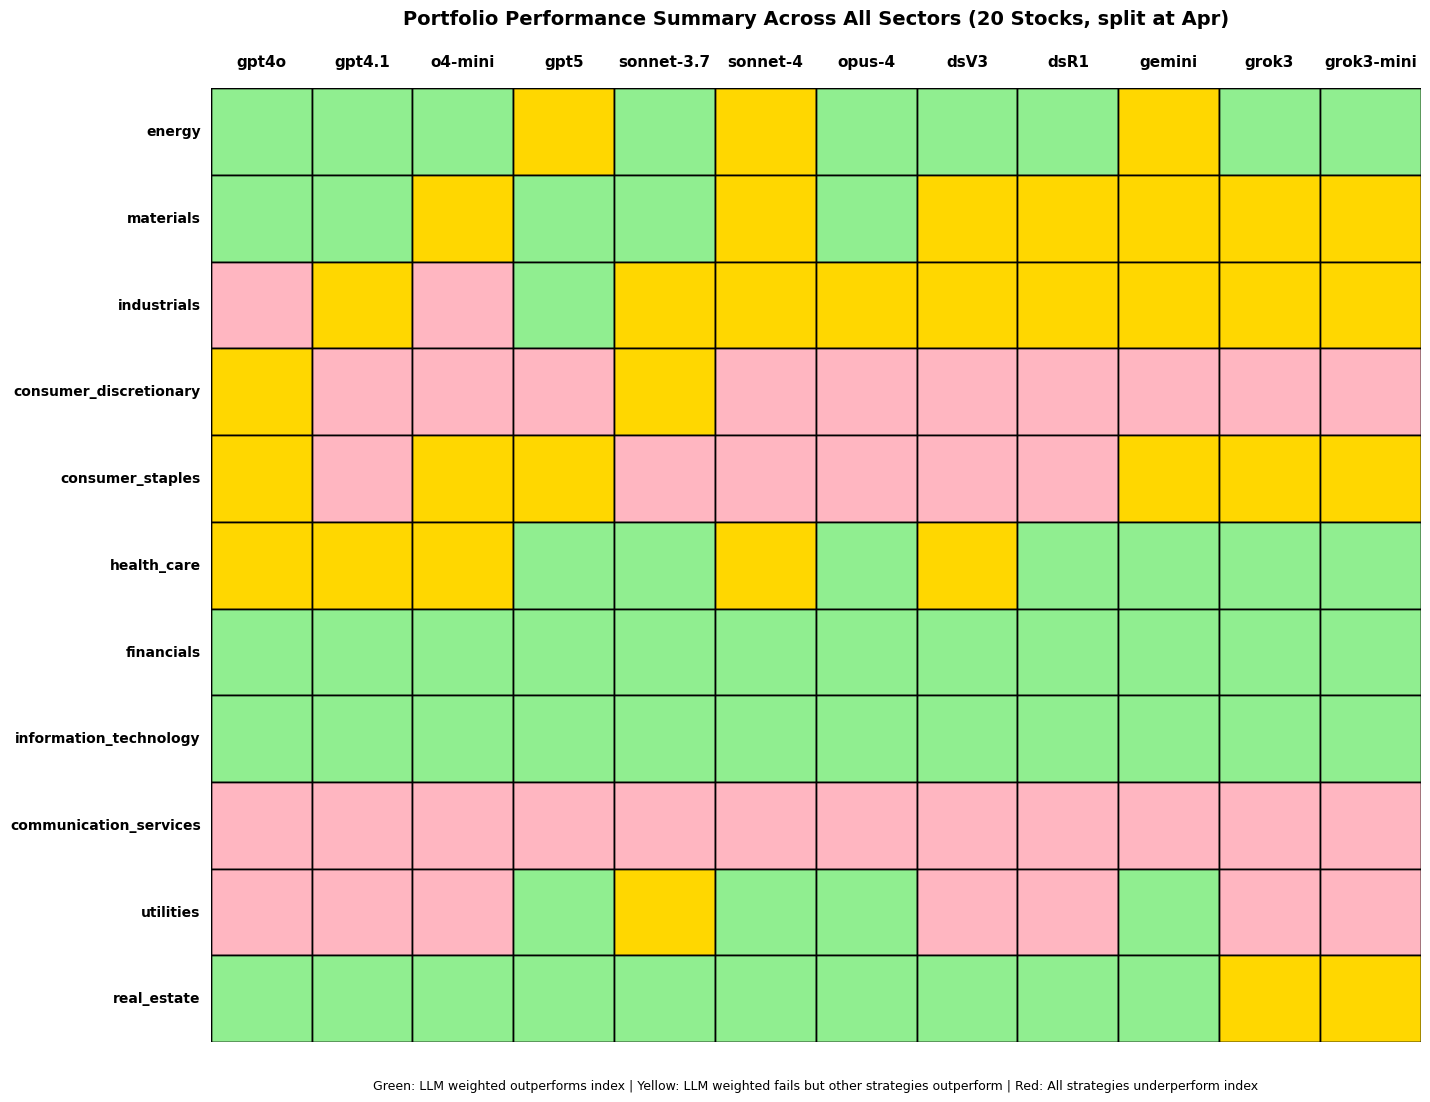

In [31]:
fig, ax = plt.subplots(figsize=(len(models)*1.2, len(pivot_table.index)))

ax.set_xlim(0, len(models))
ax.set_ylim(0, len(pivot_table.index))

for i, sector in enumerate(pivot_table.index):
    for j, model in enumerate(models):
        color = color_matrix.loc[sector, model]
        
        rect = patches.Rectangle((j, len(pivot_table.index)-1-i), 1, 1, 
                               linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        
        if j == 0:
            ax.text(-0.1, len(pivot_table.index)-1-i+0.5, sector, 
                   ha='right', va='center', fontweight='bold', fontsize=10)

for j, model in enumerate(models):
    ax.text(j+0.5, len(pivot_table.index)+0.3, model, 
           ha='center', va='center', fontweight='bold', fontsize=11)

for i in range(len(pivot_table.index) + 1):
    ax.axhline(y=i, xmin=0, xmax=1, color='black', linewidth=1)
for j in range(len(models) + 1):
    ax.axvline(x=j, ymin=0, ymax=1, color='black', linewidth=1)

ax.text(len(models)/2, len(pivot_table.index)+0.8, 
        f'Portfolio Performance Summary Across All Sectors ({stocks_num} Stocks, split at {time_split})', 
        ha='center', va='center', fontweight='bold', fontsize=14)

legend_text = ('Green: LLM weighted outperforms index | '
               'Yellow: LLM weighted fails but other strategies outperform | '
               'Red: All strategies underperform index')
ax.text(len(models)/2, -0.5, legend_text, ha='center', va='center', fontsize=9)

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.tight_layout()
plt.show()


## Summary metrics (without GPT-4o)

## Heat Map

In [ ]:
# Configuration
stocks_num = '20'
time_periods = ['Oct', 'Jan', 'Apr']

# Color mapping for red count
color_mapping = {
    0: 'white',  # Yellow-green for no failures
    1: '#FFB6C1',  # Light red for 1 failure
    2: '#FF6B6B',  # Medium red for 2 failures
    3: '#8B0000'   # Deep red for all failures
}

def get_sector_model_color(sector_data, model):
    """
    Green: LLM weighted outperforms index (< 0)
    Yellow: LLM weighted fails but other strategies outperform 
    Red: All strategies underperform index
    """
    model_metrics = [col for col in sector_data.index if col.startswith(model)]
    
    weighted_metrics = [col for col in model_metrics if 'weighted' in col]
    other_metrics = [col for col in model_metrics if 'weighted' not in col]
    
    if not weighted_metrics:
        return 'Red'
    
    weighted_value = sector_data[weighted_metrics[0]]
    
    other_values = [sector_data[col] for col in other_metrics]
    
    if weighted_value is not None and weighted_value < 0:
        return 'Green'
    elif weighted_value is not None and any(v < 0 for v in other_values):
        return 'Yellow'
    else:
        return 'Red'

def process_time_period(time_split):
    """Process data for a single time period"""
    df_diff = pd.read_csv(f'difference/sector_performance_differences_stocks{stocks_num}_{time_split}.csv')
    
    # Clean portfolio names
    df_diff_cleaned = df_diff.copy()
    df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
        lambda x: x.split('_weighted')[0] + '_weighted' if 'weighted' in x else x
    )
    df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
        lambda x: x.split('_equal')[0] + '_equal' if 'equal' in x else x
    )
    
    # Create pivot table
    pivot_table = df_diff_cleaned.pivot(index='sector', columns='portfolio', values='difference')
    sector_order = df_diff_cleaned['sector'].drop_duplicates().tolist()
    pivot_table = pivot_table.reindex(sector_order)
    
    return pivot_table

def calculate_consistency_matrix():
    """Calculate consistency matrix across all time periods"""
    models = ["gpt4o", "gpt4.1", "o4-mini", "gpt-5", "sonnet-3.7", "sonnet-4", "opus-4", "dsV3", "dsR1", "gemini", "grok3", "grok3-mini"]
    
    # Process all time periods
    pivot_tables = {}
    for time_split in time_periods:
        pivot_tables[time_split] = process_time_period(time_split)
    
    # Get sectors (assuming same sectors across all time periods)
    sectors = pivot_tables[time_periods[0]].index.tolist()
    
    # Calculate color matrix for each time period
    color_matrices = {}
    for time_split in time_periods:
        color_matrix = pd.DataFrame(index=sectors, columns=models)
        for sector in sectors:
            sector_data = pivot_tables[time_split].loc[sector]
            for model in models:
                color_matrix.loc[sector, model] = get_sector_model_color(sector_data, model)
        color_matrices[time_split] = color_matrix
    
    # Count red occurrences for each sector-model combination
    red_count_matrix = pd.DataFrame(index=sectors, columns=models, dtype=int)
    
    for sector in sectors:
        for model in models:
            red_count = 0
            for time_split in time_periods:
                if color_matrices[time_split].loc[sector, model] == 'Red':
                    red_count += 1
            red_count_matrix.loc[sector, model] = red_count
    
    return red_count_matrix, models, sectors

def create_consistency_heatmap():
    """Create the consistency heatmap"""
    red_count_matrix, models, sectors = calculate_consistency_matrix()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(len(models)*1.2, len(sectors)))
    ax.set_xlim(0, len(models))
    ax.set_ylim(0, len(sectors))
    
    # Draw rectangles
    for i, sector in enumerate(sectors):
        for j, model in enumerate(models):
            red_count = red_count_matrix.loc[sector, model]
            color = color_mapping[red_count]
            
            rect = patches.Rectangle((j, len(sectors)-1-i), 1, 1, 
                                   linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)
            
            # Add sector labels
            if j == 0:
                ax.text(-0.1, len(sectors)-1-i+0.5, sector, 
                       ha='right', va='center', fontweight='bold', fontsize=10)
    
    # Add model labels
    for j, model in enumerate(models):
        ax.text(j+0.5, len(sectors)+0.3, model, 
               ha='center', va='center', fontweight='bold', fontsize=11)
    
    # Add grid lines
    for i in range(len(sectors) + 1):
        ax.axhline(y=i, xmin=0, xmax=1, color='black', linewidth=1)
    for j in range(len(models) + 1):
        ax.axvline(x=j, ymin=0, ymax=1, color='black', linewidth=1)
    
    # Add title
    ax.text(len(models)/2, len(sectors)+0.8, 
            f'Portfolio Consistency Analysis Across Time Periods ({stocks_num} Stocks)', 
            ha='center', va='center', fontweight='bold', fontsize=14)
    
    # Add legend
    legend_text = ('White: No failures across all periods | '
                   'Light Red: 1 failure | Medium Red: 2 failures | '
                   'Deep Red: All periods failed')
    ax.text(len(models)/2, -0.5, legend_text, ha='center', va='center', fontsize=9)
    
    # Clean up axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return red_count_matrix

Processing portfolio consistency analysis...


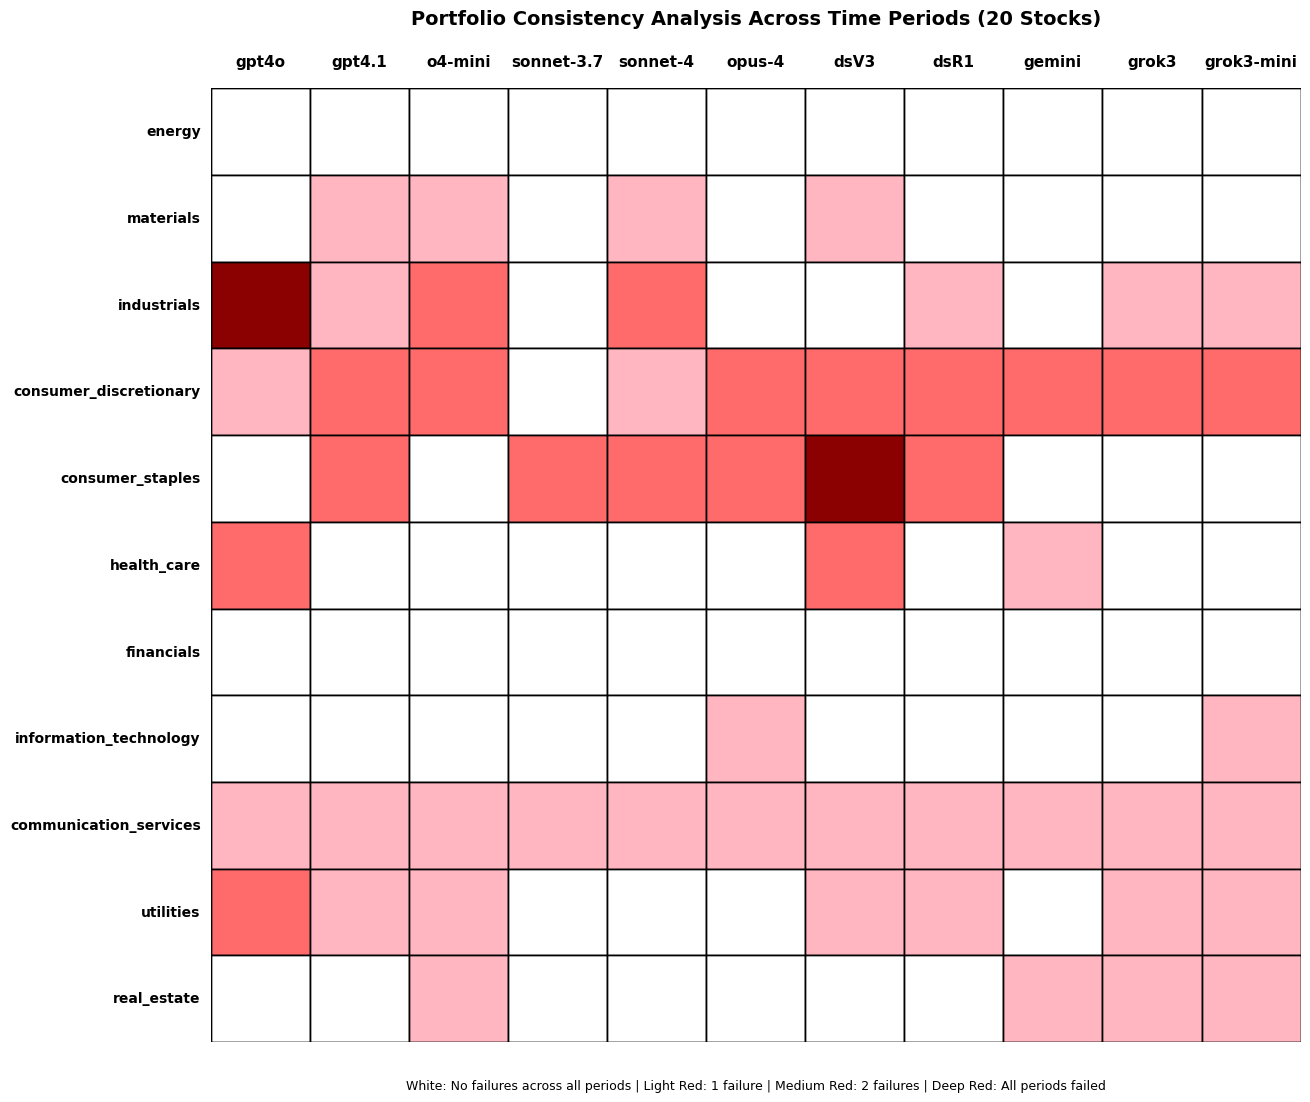


Red count matrix (0=no failures, 3=all failures):
                        gpt4o  gpt4.1  o4-mini  sonnet-3.7  sonnet-4  opus-4  \
energy                    0.0     0.0      0.0         0.0       0.0     0.0   
materials                 0.0     1.0      1.0         0.0       1.0     0.0   
industrials               3.0     1.0      2.0         0.0       2.0     0.0   
consumer_discretionary    1.0     2.0      2.0         0.0       1.0     2.0   
consumer_staples          0.0     2.0      0.0         2.0       2.0     2.0   
health_care               2.0     0.0      0.0         0.0       0.0     0.0   
financials                0.0     0.0      0.0         0.0       0.0     0.0   
information_technology    0.0     0.0      0.0         0.0       0.0     1.0   
communication_services    1.0     1.0      1.0         1.0       1.0     1.0   
utilities                 2.0     1.0      1.0         0.0       0.0     0.0   
real_estate               0.0     0.0      1.0         0.0       0.0 

In [79]:
# Main execution
if __name__ == "__main__":
    print("Processing portfolio consistency analysis...")
    red_count_matrix = create_consistency_heatmap()
    
    print("\nRed count matrix (0=no failures, 3=all failures):")
    print(red_count_matrix)
    
    # Print summary statistics
    print(f"\nSummary Statistics:")
    print(f"Total combinations: {red_count_matrix.size}")
    print(f"No failures (0 red): {(red_count_matrix == 0).sum().sum()}")
    print(f"1 failure: {(red_count_matrix == 1).sum().sum()}")
    print(f"2 failures: {(red_count_matrix == 2).sum().sum()}")
    print(f"All failures (3 red): {(red_count_matrix == 3).sum().sum()}")
    
    # Find most consistent performers
    print(f"\nMost consistent (0 failures):")
    no_failures = red_count_matrix[red_count_matrix == 0]
    for sector in no_failures.index:
        for model in no_failures.columns:
            if no_failures.loc[sector, model] == 0:
                print(f"  {sector} - {model}")

## Heatmap for 2 time splits

In [ ]:
# Configuration
stocks_num = '20'
time_periods = ['Jan', 'Apr']

# Color mapping for red count
color_mapping = {
    0: 'white',  # Yellow-green for no failures
    1: '#FFB6C1',  # Light red for 1 failure
    2: '#FF6B6B',  # Medium red for 2 failures
}

def get_sector_model_color(sector_data, model):
    """
    Green: LLM weighted outperforms index (< 0)
    Yellow: LLM weighted fails but other strategies outperform 
    Red: All strategies underperform index
    """
    model_metrics = [col for col in sector_data.index if col.startswith(model)]
    
    weighted_metrics = [col for col in model_metrics if 'weighted' in col]
    other_metrics = [col for col in model_metrics if 'weighted' not in col]
    
    if not weighted_metrics:
        return 'Red'
    
    weighted_value = sector_data[weighted_metrics[0]]
    
    other_values = [sector_data[col] for col in other_metrics]
    
    if weighted_value is not None and weighted_value < 0:
        return 'Green'
    elif weighted_value is not None and any(v < 0 for v in other_values):
        return 'Yellow'
    else:
        return 'Red'

def process_time_period(time_split):
    """Process data for a single time period"""
    df_diff = pd.read_csv(f'difference/sector_performance_differences_stocks{stocks_num}_{time_split}.csv')
    
    # Clean portfolio names
    df_diff_cleaned = df_diff.copy()
    df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
        lambda x: x.split('_weighted')[0] + '_weighted' if 'weighted' in x else x
    )
    df_diff_cleaned['portfolio'] = df_diff_cleaned['portfolio'].apply(
        lambda x: x.split('_equal')[0] + '_equal' if 'equal' in x else x
    )
    
    # Create pivot table
    pivot_table = df_diff_cleaned.pivot(index='sector', columns='portfolio', values='difference')
    sector_order = df_diff_cleaned['sector'].drop_duplicates().tolist()
    pivot_table = pivot_table.reindex(sector_order)
    
    return pivot_table

def calculate_consistency_matrix():
    """Calculate consistency matrix across all time periods"""
    models = ["gpt4o", "gpt4.1", "o4-mini", "gpt-5", "sonnet-3.7", "sonnet-4", "opus-4", "dsV3", "dsR1", "gemini", "grok3", "grok3-mini"]

    # Process all time periods
    pivot_tables = {}
    for time_split in time_periods:
        pivot_tables[time_split] = process_time_period(time_split)
    
    # Get sectors (assuming same sectors across all time periods)
    sectors = pivot_tables[time_periods[0]].index.tolist()
    
    # Calculate color matrix for each time period
    color_matrices = {}
    for time_split in time_periods:
        color_matrix = pd.DataFrame(index=sectors, columns=models)
        for sector in sectors:
            sector_data = pivot_tables[time_split].loc[sector]
            for model in models:
                color_matrix.loc[sector, model] = get_sector_model_color(sector_data, model)
        color_matrices[time_split] = color_matrix
    
    # Count red occurrences for each sector-model combination
    red_count_matrix = pd.DataFrame(index=sectors, columns=models, dtype=int)
    
    for sector in sectors:
        for model in models:
            red_count = 0
            for time_split in time_periods:
                if color_matrices[time_split].loc[sector, model] == 'Red':
                    red_count += 1
            red_count_matrix.loc[sector, model] = red_count
    
    return red_count_matrix, models, sectors

def create_consistency_heatmap():
    """Create the consistency heatmap"""
    red_count_matrix, models, sectors = calculate_consistency_matrix()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(len(models)*1.2, len(sectors)))
    ax.set_xlim(0, len(models))
    ax.set_ylim(0, len(sectors))
    
    # Draw rectangles
    for i, sector in enumerate(sectors):
        for j, model in enumerate(models):
            red_count = red_count_matrix.loc[sector, model]
            color = color_mapping[red_count]
            
            rect = patches.Rectangle((j, len(sectors)-1-i), 1, 1, 
                                   linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)
            
            # Add sector labels
            if j == 0:
                ax.text(-0.1, len(sectors)-1-i+0.5, sector, 
                       ha='right', va='center', fontweight='bold', fontsize=10)
    
    # Add model labels
    for j, model in enumerate(models):
        ax.text(j+0.5, len(sectors)+0.3, model, 
               ha='center', va='center', fontweight='bold', fontsize=11)
    
    # Add grid lines
    for i in range(len(sectors) + 1):
        ax.axhline(y=i, xmin=0, xmax=1, color='black', linewidth=1)
    for j in range(len(models) + 1):
        ax.axvline(x=j, ymin=0, ymax=1, color='black', linewidth=1)
    
    # Add title
    ax.text(len(models)/2, len(sectors)+0.8, 
            f'Portfolio Consistency Analysis Across Time Periods ({stocks_num} Stocks)', 
            ha='center', va='center', fontweight='bold', fontsize=14)
    
    # Add legend
    legend_text = ('White: No failures across all periods | '
                   'Light Red: 1 failure | Medium Red: 2 failures | '
                   )
    ax.text(len(models)/2, -0.5, legend_text, ha='center', va='center', fontsize=9)
    
    # Clean up axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return red_count_matrix

Processing portfolio consistency analysis...


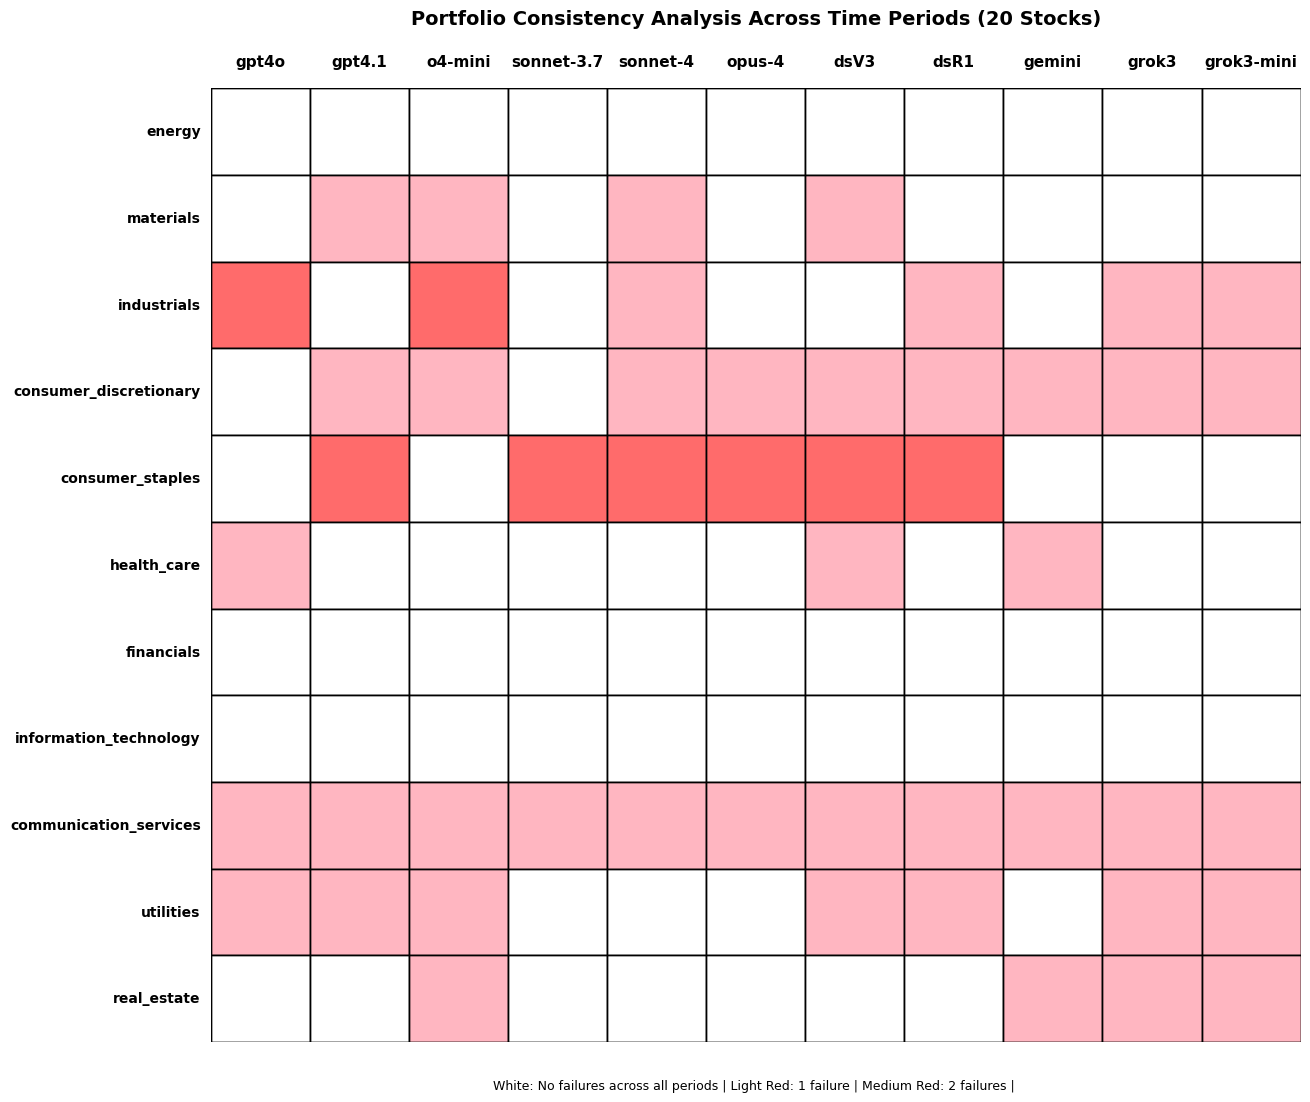


Red count matrix (0=no failures, 2=all failures):
                        gpt4o  gpt4.1  o4-mini  sonnet-3.7  sonnet-4  opus-4  \
energy                    0.0     0.0      0.0         0.0       0.0     0.0   
materials                 0.0     1.0      1.0         0.0       1.0     0.0   
industrials               2.0     0.0      2.0         0.0       1.0     0.0   
consumer_discretionary    0.0     1.0      1.0         0.0       1.0     1.0   
consumer_staples          0.0     2.0      0.0         2.0       2.0     2.0   
health_care               1.0     0.0      0.0         0.0       0.0     0.0   
financials                0.0     0.0      0.0         0.0       0.0     0.0   
information_technology    0.0     0.0      0.0         0.0       0.0     0.0   
communication_services    1.0     1.0      1.0         1.0       1.0     1.0   
utilities                 1.0     1.0      1.0         0.0       0.0     0.0   
real_estate               0.0     0.0      1.0         0.0       0.0 

In [3]:
# Main execution
if __name__ == "__main__":
    print("Processing portfolio consistency analysis...")
    red_count_matrix = create_consistency_heatmap()
    
    print("\nRed count matrix (0=no failures, 2=all failures):")
    print(red_count_matrix)
    
    # Print summary statistics
    print(f"\nSummary Statistics:")
    print(f"Total combinations: {red_count_matrix.size}")
    print(f"No failures (0 red): {(red_count_matrix == 0).sum().sum()}")
    print(f"1 failure: {(red_count_matrix == 1).sum().sum()}")
    print(f"2 failures: {(red_count_matrix == 2).sum().sum()}")
    
    # Find most consistent performers
    print(f"\nMost consistent (0 failures):")
    no_failures = red_count_matrix[red_count_matrix == 0]
    for sector in no_failures.index:
        for model in no_failures.columns:
            if no_failures.loc[sector, model] == 0:
                print(f"  {sector} - {model}")